<a href="https://colab.research.google.com/github/megha1823/MAJOR-PROJECT/blob/main/DS_MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA SCIENCE project regarding ongoing Pandemic**


1. Gathering of Data(Data Collection)
2. Cleaning of Data(Taking required number of features)
3. Plotting a graph - Active Cases vs Recovered Cases(2 countries)
4. Which country is worst affected in terms of cases,death
5. Forecasting for a month based on previous data-India

**1. Data Collection**


In [1]:
import numpy as np
import pandas as pd
import io
import requests
#importing the data
df=pd.read_csv('/content/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81880,ZWE,Africa,Zimbabwe,2021-04-11,37288.0,15.0,52.143,1538.0,0.0,1.857,2508.793,1.009,3.508,103.479,0.000,0.125,1.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1257.0,456936.0,30.743,0.085,1964.0,0.132,0.027,37.7,tests performed,223492.0,194594.0,28898.0,759.0,12085.0,1.50,1.31,0.19,813.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
81881,ZWE,Africa,Zimbabwe,2021-04-12,37307.0,19.0,53.286,1542.0,4.0,2.429,2510.071,1.278,3.585,103.748,0.269,0.163,1.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1111.0,458047.0,30.818,0.075,1955.0,0.132,0.027,36.7,tests performed,234579.0,205275.0,29304.0,11087.0,12724.0,1.58,1.38,0.20,856.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
81882,ZWE,Africa,Zimbabwe,2021-04-13,37330.0,23.0,52.000,1543.0,1.0,1.714,2511.618,1.547,3.499,103.815,0.067,0.115,1.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248355.0,218516.0,29839.0,13776.0,12246.0,1.67,1.47,0.20,824.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
81883,ZWE,Africa,Zimbabwe,2021

**2. Cleaning the data**

In [2]:
df=df[['iso_code','location','date','total_cases','total_deaths','new_cases']]
#renaming the columns of dataframe using dictionary
df=df.rename(columns={'iso_code':'iso','date':'ds'})

In [3]:
df.isnull().sum()
#dropping the NULL values from the dataframe
df=df.dropna()
#converting the columns of dataframe into required formats
df['ds']=pd.to_datetime(df['ds'])
df['iso']=df['iso'].apply(str)
df['total_cases']=df['total_cases'].astype(int)
df['total_deaths']=df['total_deaths'].astype(int)
df['new_cases']=df['new_cases'].astype(int)
df

,iso,location,ds,total_cases,total_deaths,new_cases
27,AFG,Afghanistan,2020-03-22,34,1,4
28,AFG,Afghanistan,2020-03-23,41,1,7
29,AFG,Afghanistan,2020-03-24,43,1,2
30,AFG,Afghanistan,2020-03-25,76,2,33
31,AFG,Afghanistan,2020-03-26,80,3,4
...,...,...,...,...,...,...
81880,ZWE,Zimbabwe,2021-04-11,37288,1538,15
81881,ZWE,Zimbabwe,2021-04-12,37307,1542,19
81882,ZWE,Zimbabwe,2021-04-13,37330,1543,23
81883,ZWE,Zimbabwe,2021-04-14,37369,1548,39


In [4]:
df=df.set_index('iso')
df

,location,ds,total_cases,total_deaths,new_cases
iso,,,,,
AFG,Afghanistan,2020-03-22,34,1,4
AFG,Afghanistan,2020-03-23,41,1,7
AFG,Afghanistan,2020-03-24,43,1,2
AFG,Afghanistan,2020-03-25,76,2,33
AFG,Afghanistan,2020-03-26,80,3,4
...,...,...,...,...,...
ZWE,Zimbabwe,2021-04-11,37288,1538,15
ZWE,Zimbabwe,2021-04-12,37307,1542,19
ZWE,Zimbabwe,2021-04-13,37330,1543,23


In [6]:
#Dropping the unwanted rows
df.drop(['OWID_WRL','OWID_AFR','OWID_SAM','OWID_OCE','OWID_NAM','OWID_EUN','OWID_EUR','OWID_ASI','OWID_INT','OWID_KOS'],axis=00,inplace=True)

In [7]:
#Resetting the indexes after dropping unwanted rows
df=df.reset_index()
df

,iso,location,ds,total_cases,total_deaths,new_cases
0,AFG,Afghanistan,2020-03-22,34,1,4
1,AFG,Afghanistan,2020-03-23,41,1,7
2,AFG,Afghanistan,2020-03-24,43,1,2
3,AFG,Afghanistan,2020-03-25,76,2,33
4,AFG,Afghanistan,2020-03-26,80,3,4
...,...,...,...,...,...,...
66347,ZWE,Zimbabwe,2021-04-11,37288,1538,15
66348,ZWE,Zimbabwe,2021-04-12,37307,1542,19
66349,ZWE,Zimbabwe,2021-04-13,37330,1543,23
66350,ZWE,Zimbabwe,2021-04-14,37369,1548,39


**Since the dataframe does not contain Active cases and Recovered informations the below calculations are being performed**

In [8]:
df['total_recovered']=df['total_cases']-df['total_deaths']-df['new_cases']
df

,iso,location,ds,total_cases,total_deaths,new_cases,total_recovered
0,AFG,Afghanistan,2020-03-22,34,1,4,29
1,AFG,Afghanistan,2020-03-23,41,1,7,33
2,AFG,Afghanistan,2020-03-24,43,1,2,40
3,AFG,Afghanistan,2020-03-25,76,2,33,41
4,AFG,Afghanistan,2020-03-26,80,3,4,73
...,...,...,...,...,...,...,...
66347,ZWE,Zimbabwe,2021-04-11,37288,1538,15,35735
66348,ZWE,Zimbabwe,2021-04-12,37307,1542,19,35746
66349,ZWE,Zimbabwe,2021-04-13,37330,1543,23,35764
66350,ZWE,Zimbabwe,2021-04-14,37369,1548,39,35782


In [9]:
df['active_cases']=df['total_cases']-df['total_recovered']-df['total_deaths']
df

,iso,location,ds,total_cases,total_deaths,new_cases,total_recovered,active_cases
0,AFG,Afghanistan,2020-03-22,34,1,4,29,4
1,AFG,Afghanistan,2020-03-23,41,1,7,33,7
2,AFG,Afghanistan,2020-03-24,43,1,2,40,2
3,AFG,Afghanistan,2020-03-25,76,2,33,41,33
4,AFG,Afghanistan,2020-03-26,80,3,4,73,4
...,...,...,...,...,...,...,...,...
66347,ZWE,Zimbabwe,2021-04-11,37288,1538,15,35735,15
66348,ZWE,Zimbabwe,2021-04-12,37307,1542,19,35746,19
66349,ZWE,Zimbabwe,2021-04-13,37330,1543,23,35764,23
66350,ZWE,Zimbabwe,2021-04-14,37369,1548,39,35782,39


In [10]:
df_india=df.loc[(df['iso']=='IND')]
df_usa=df.loc[(df['iso']=='USA')]
df_new=pd.concat([df_india,df_usa])
df_new=df_new.reset_index()
df_new

,index,iso,location,ds,total_cases,total_deaths,new_cases,total_recovered,active_cases
0,27739,IND,India,2020-03-11,62,1,6,55,6
1,27740,IND,India,2020-03-12,73,1,11,61,11
2,27741,IND,India,2020-03-13,82,2,9,71,9
3,27742,IND,India,2020-03-14,102,2,20,80,20
4,27743,IND,India,2020-03-15,113,2,11,100,11
...,...,...,...,...,...,...,...,...,...
808,63815,USA,United States,2021-04-11,31197877,562156,46380,30589341,46380
809,63816,USA,United States,2021-04-12,31268107,562623,70230,30635254,70230
810,63817,USA,United States,2021-04-13,31345985,563446,77878,30704661,77878
811,63818,USA,United States,2021-04-14,31421360,564402,75375,30781583,75375


In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            813 non-null    int64         
 1   iso              813 non-null    object        
 2   location         813 non-null    object        
 3   ds               813 non-null    datetime64[ns]
 4   total_cases      813 non-null    int64         
 5   total_deaths     813 non-null    int64         
 6   new_cases        813 non-null    int64         
 7   total_recovered  813 non-null    int64         
 8   active_cases     813 non-null    int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 57.3+ KB


In [12]:
import matplotlib.pyplot as plt
def plot_var(var='total_recovered',iso='IND'):
  assert type(var)==str
  assert type(iso)==str
  y=df_new[df_new['iso']==iso][var]
  x=df_new[df_new['iso']==iso]['ds']
  plt.figure(figsize=(16,4))
  plt.title('Plot of \'{}\' for {}'.format(var,iso),fontsize=20)
  plt.bar(x=x,height=y,edgecolor='white',color='green')
  plt.grid(True)
  plt.xticks(fontsize=16,rotation=45)
  plt.yticks(fontsize=16)
  plt.show()

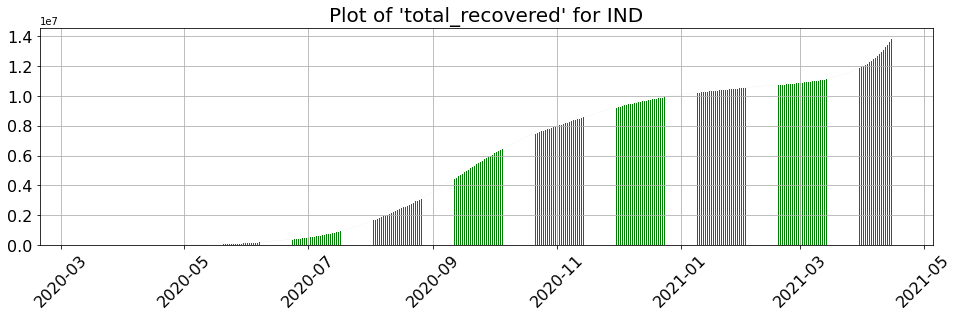

In [13]:
plot_var()

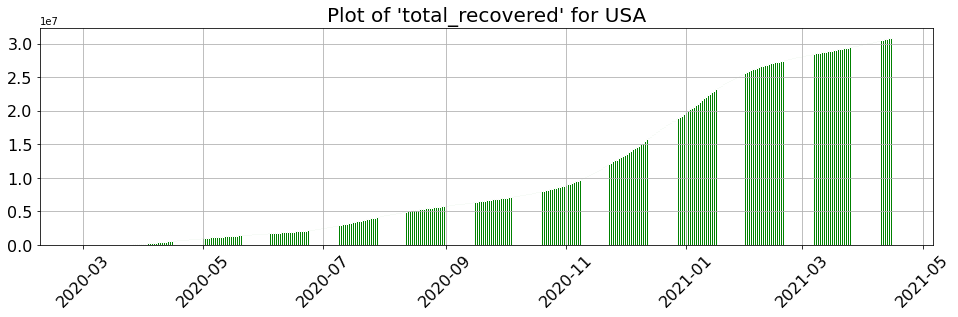

In [14]:
plot_var('total_recovered','USA')

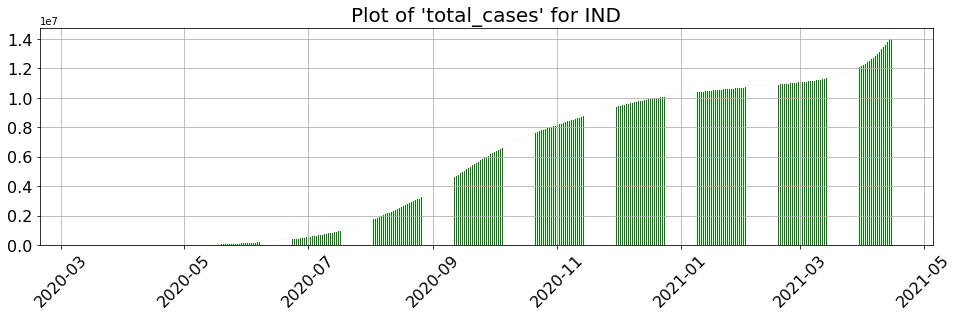

In [15]:
plot_var('total_cases','IND')

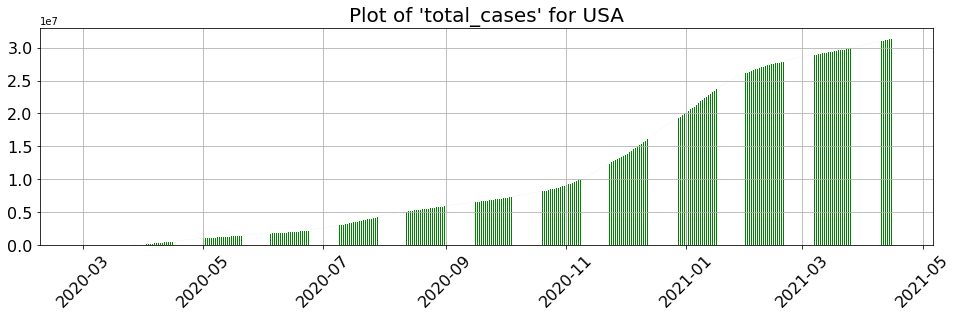

In [16]:
plot_var('total_cases','USA')

**3. Plotting a graph-Active cases vs Recovered**

In [17]:
def plot_xy(varx='active_cases',
            vary='total_recovered',
            iso='IND',
            iso1='USA'):
   
    assert type(varx)==str
    assert type(vary)==str 
    
    x = df_new[df_new['iso']==iso][varx]
    y = df_new[df_new['iso']==iso][vary]
    x1 = df_new[df_new['iso']==iso1][varx]
    y1 = df_new[df_new['iso']==iso1][vary]
    
    if (x.nunique()!=1) and (y.nunique()!=1):
        plt.figure(figsize=(15,5))
        plt.title("Plot of Active Cases vs Total Recovered for India and USA ",fontsize=18)
        plt.scatter(x=x,y=y,edgecolor='k',color='lightgreen',s=120)
        plt.scatter(x=x1,y=y1,edgecolor='k',color='r',s=120)
        plt.grid(True)
        plt.xticks(fontsize=14,rotation=45)
        plt.yticks(fontsize=14)
        plt.xlabel("Active Cases",fontsize=16)
        plt.ylabel("Total Recovered",fontsize=16)
        plt.show()
    else:
        print("Complete Data Unavailable!!")


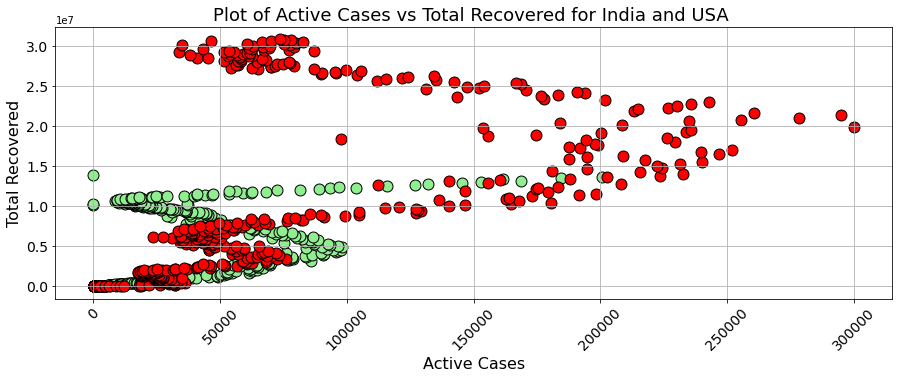

In [19]:
plot_xy(iso='IND',iso1='USA')

In [22]:
#Using plot
def plotTesting(iso=['IND','USA']):
    
    legends = []
    plt.figure(figsize=(14,5))
    plt.title("Total Recovered results",fontsize=18)
    for s in iso:
        data = np.array(df_new[df_new['iso']==s]['total_recovered'])[-1::-1]
        slope = int((data[-1]-data[0])/len(data))
        plt.plot(data,linewidth=2)
        plt.text(x=len(data)-2,y=data[-1]*1.05,s=s,fontsize=14)
        legends.append(str(slope)+" recovered/day in " + s)
    plt.legend(legends,fontsize=14)
    plt.grid(True)
    plt.xlim(0,len(data)+2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("No.ofDays",fontsize=16)
    plt.ylabel("Total test results",fontsize=16)
    plt.show()

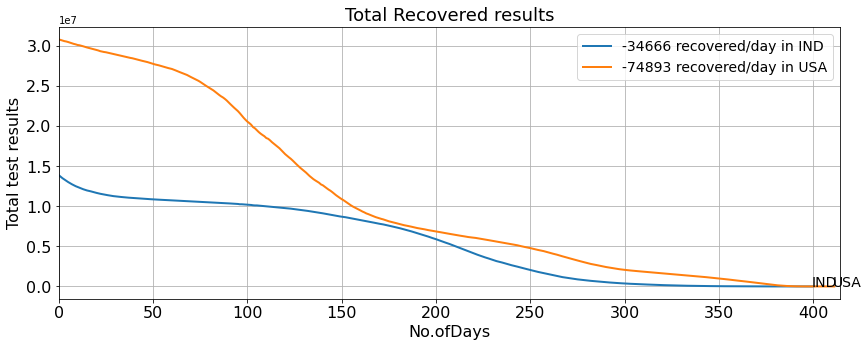

In [23]:
plotTesting()

In [26]:
#Plotting of Total Cases vs Total Recovered for India and USA using Line Plot
def plot(iso=['IND','USA']):
    
    legends = []
    plt.figure(figsize=(14,5))
    plt.title("Active Cases vs Total Recovered",fontsize=18)
    for s in iso:
        data = np.array(df_new[df_new['iso']==s]['total_recovered'])[-1::-1]      
        slope = int((data[-1]-data[0])/len(data))        
        plt.plot(data,linewidth=2)        
        plt.text(x=len(data)-2,y=data[-1]*1.05,s=s,fontsize=14)
        legends.append(str(slope)+" recovered/day in " + s)

    for s1 in iso:    
        data1 = np.array(df_new[df_new['iso']==s1]['active_cases'])[-1::-1]
        slope1 = int((data1[-1]-data1[0])/len(data1))
        plt.plot(data1,linewidth=2)
        plt.text(x=len(data1)-2,y=data1[-1]*1.05,s=s1,fontsize=14)
        legends.append(str(slope1)+" cases/day in " + s1)
    plt.legend(legends,fontsize=14)
    plt.grid(True)
    plt.xlim(0,len(data)+2)
    plt.xlim(0,len(data1)+2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("No. of Days",fontsize=16)
    plt.ylabel("Total cases vs Total Recovered",fontsize=16)
    plt.show()

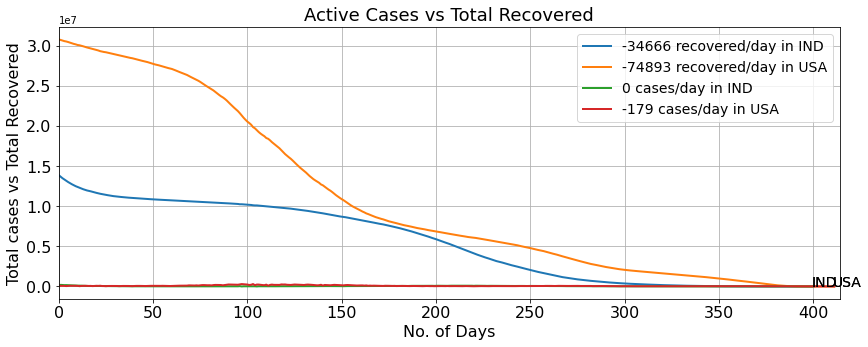

In [27]:
plot()

**4. Worst affected in terms of cases and deaths**

Text(0, 0.5, 'Total Deaths')

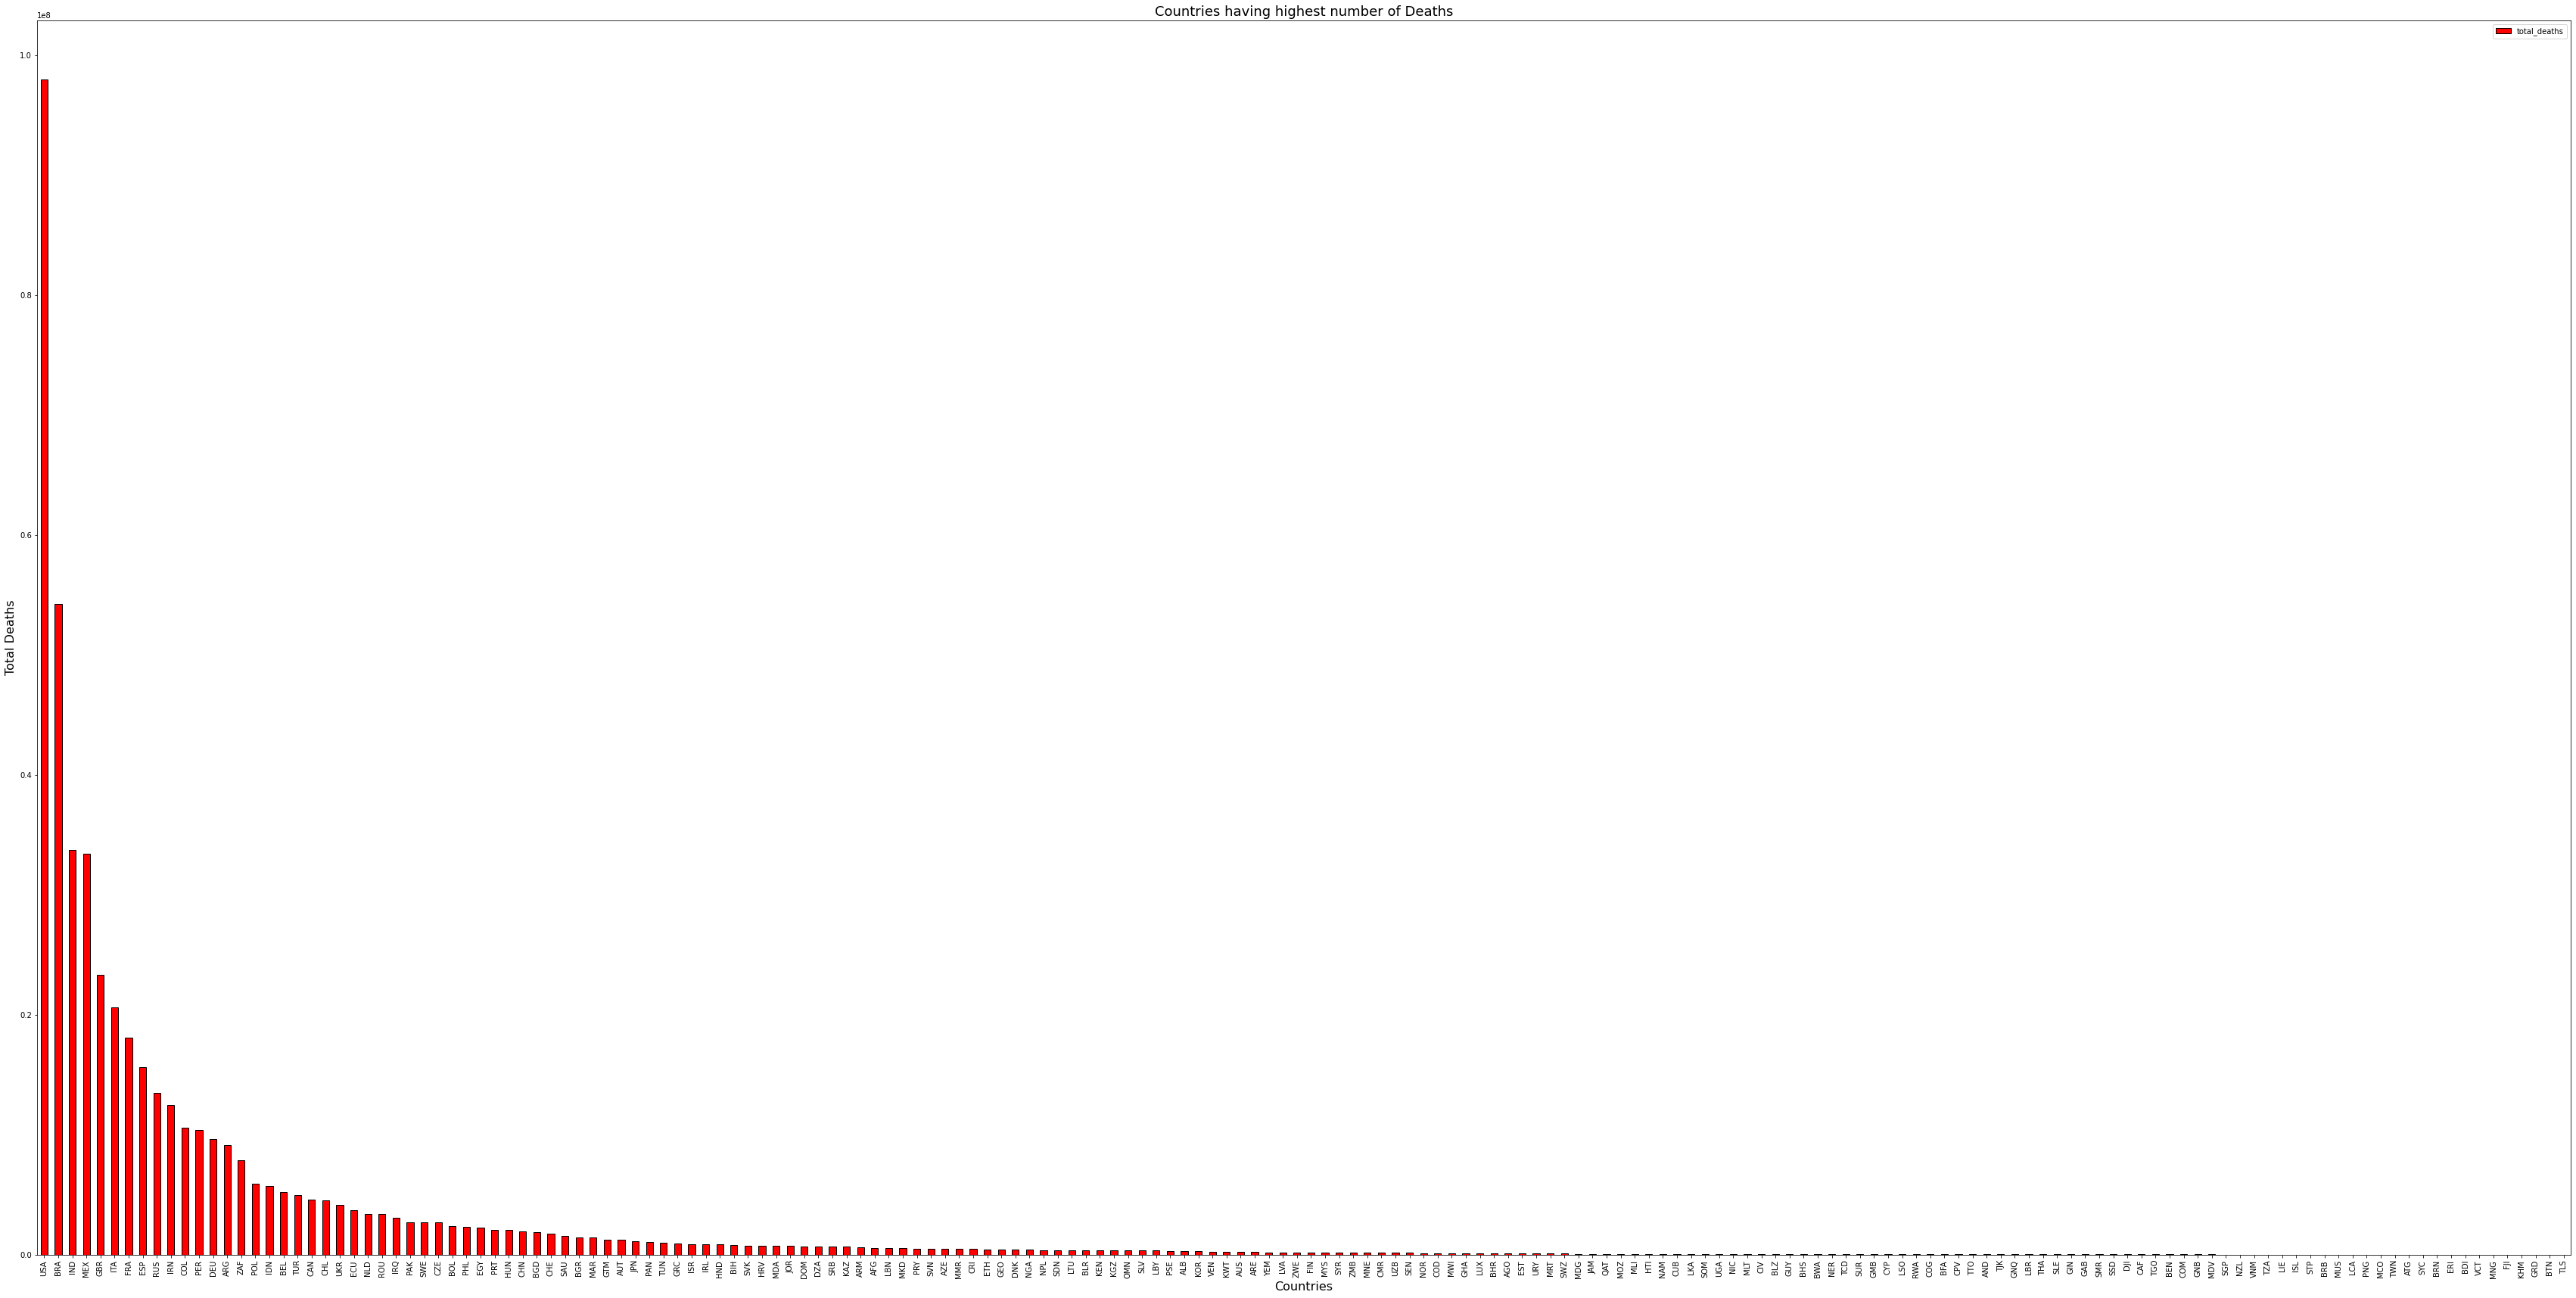

In [29]:
#In terms od Deaths
plot_data = df[['iso','total_deaths']]
plot_data =plot_data.groupby('iso').sum()

plot_data.sort_values(by='total_deaths',
                      axis=0,
                      ascending=False,
                      inplace=False,
                      kind='quicksort',
                      na_position='last').plot(kind='bar',color='r',edgecolor='k',figsize=(60,30))
plt.title("Countries having highest number of Deaths",fontsize=18)                    
plt.xlabel("Countries",fontsize=16)
plt.ylabel("Total Deaths",fontsize=16)

Text(0, 0.5, 'Total Deaths')

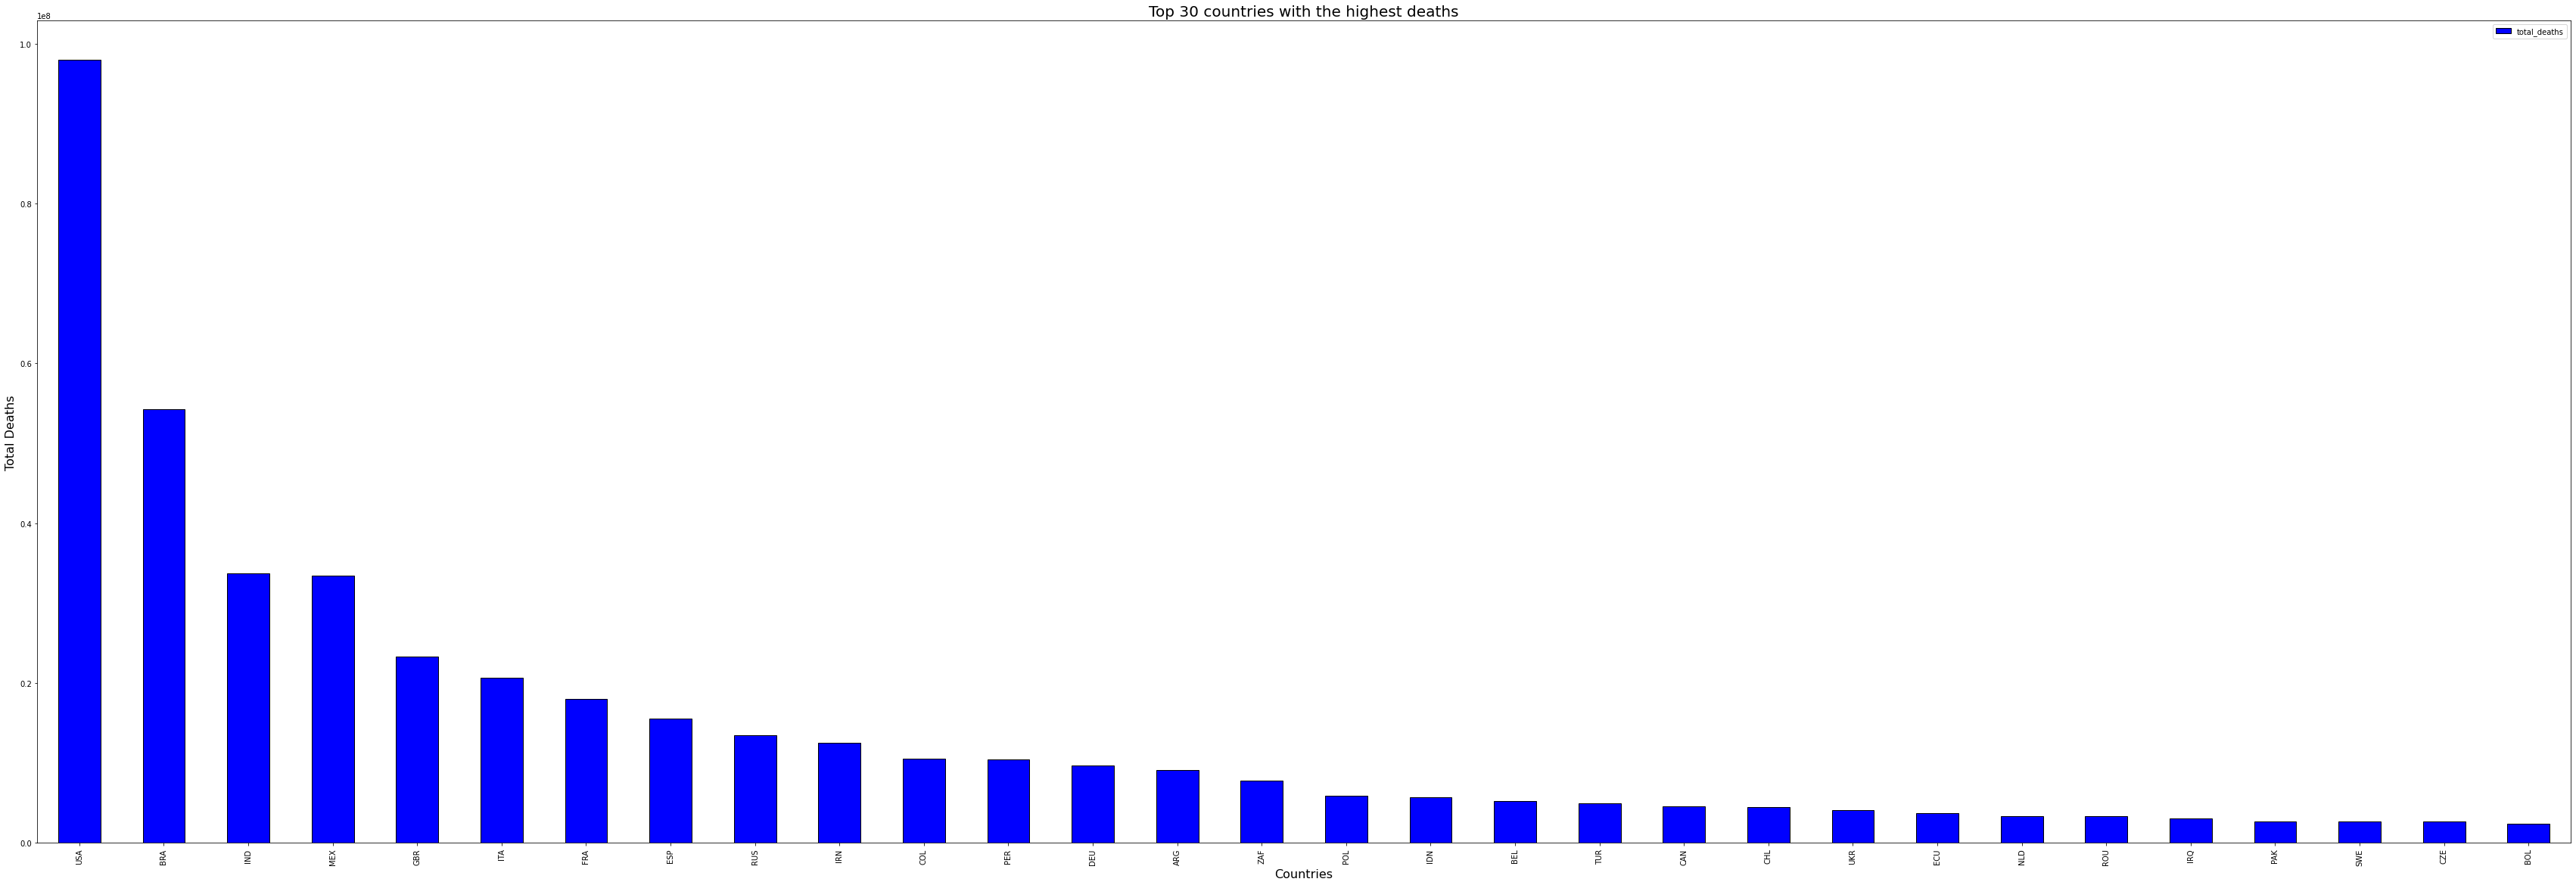

In [31]:
#Top 30 countries with the highest deaths
test=plot_data.sort_values(by='total_deaths',axis=0,ascending=False,inplace=False,kind='quicksort',na_position='last')
test.nlargest(30,'total_deaths').plot(kind='bar',color='blue',edgecolor='k',figsize=(60,20))
plt.title("Top 30 countries with the highest deaths",fontsize=20)
plt.xlabel("Countries",fontsize=16)
plt.ylabel("Total Deaths",fontsize=16)

Text(0, 0.5, 'Total Deaths')

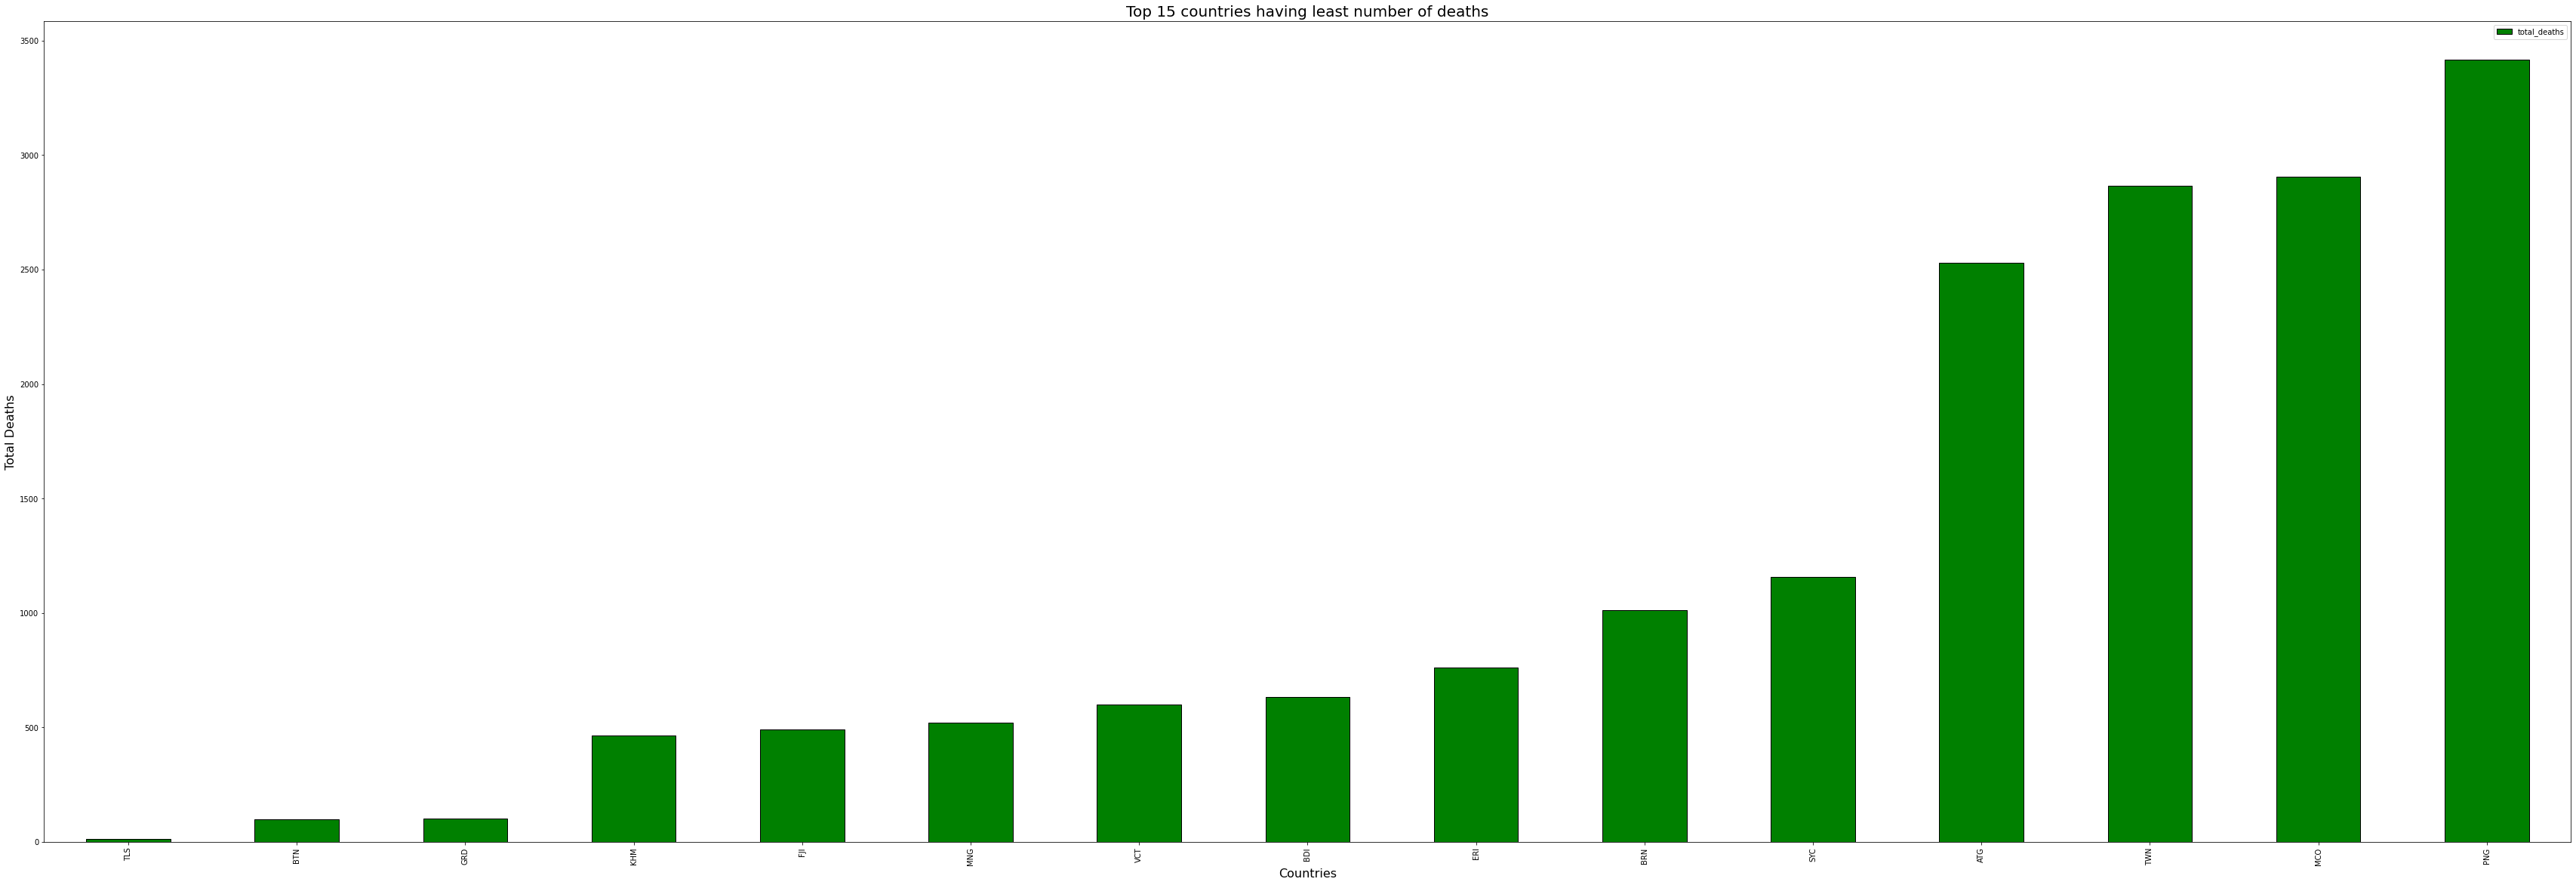

In [32]:
#Top 15 countries with the least deaths
test=plot_data.sort_values(by='total_deaths',axis=0,ascending=False,inplace=False,kind='quicksort',na_position='last')
test.nsmallest(15,'total_deaths').plot(kind='bar',color='green',edgecolor='k',figsize=(60,20))
plt.title("Top 15 countries having least number of deaths",fontsize=20)
plt.xlabel("Countries",fontsize=16)
plt.ylabel("Total Deaths",fontsize=16)

Country having highest number of deaths

In [35]:
deaths=df[['location','total_deaths']]
deaths=deaths.groupby('location').sum().sort_values(by='total_deaths',axis=0,ascending=False,inplace=False,kind='quicksort',na_position='last')
HighestDeaths=deaths.nlargest(1,'total_deaths')
HighestDeaths=HighestDeaths.reset_index()
print("The country with the highest number of deaths is :")
HighestDeaths

The country with the highest number of deaths is :


,location,total_deaths
0,United States,98000308


In [37]:
import plotly.express as px
fig=px.scatter(HighestDeaths,x='location',y='total_deaths',size='total_deaths',size_max=50,color=HighestDeaths.index,title="Country with highest number of deaths")
fig.show()

Country having lowest number of deaths

In [38]:
LowestDeaths=deaths.nsmallest(1,'total_deaths')
LowestDeaths=LowestDeaths.reset_index()
print("The country with the lowest number of deaths is :")
LowestDeaths

The country with the lowest number of deaths is :


,location,total_deaths
0,Timor,13


In [39]:
fig1=px.scatter(LowestDeaths,x='location',y='total_deaths',size='total_deaths',size_max=50,color=LowestDeaths.index,title="Country with least number of deaths")
fig1.show()

Text(0, 0.5, 'Total Cases')

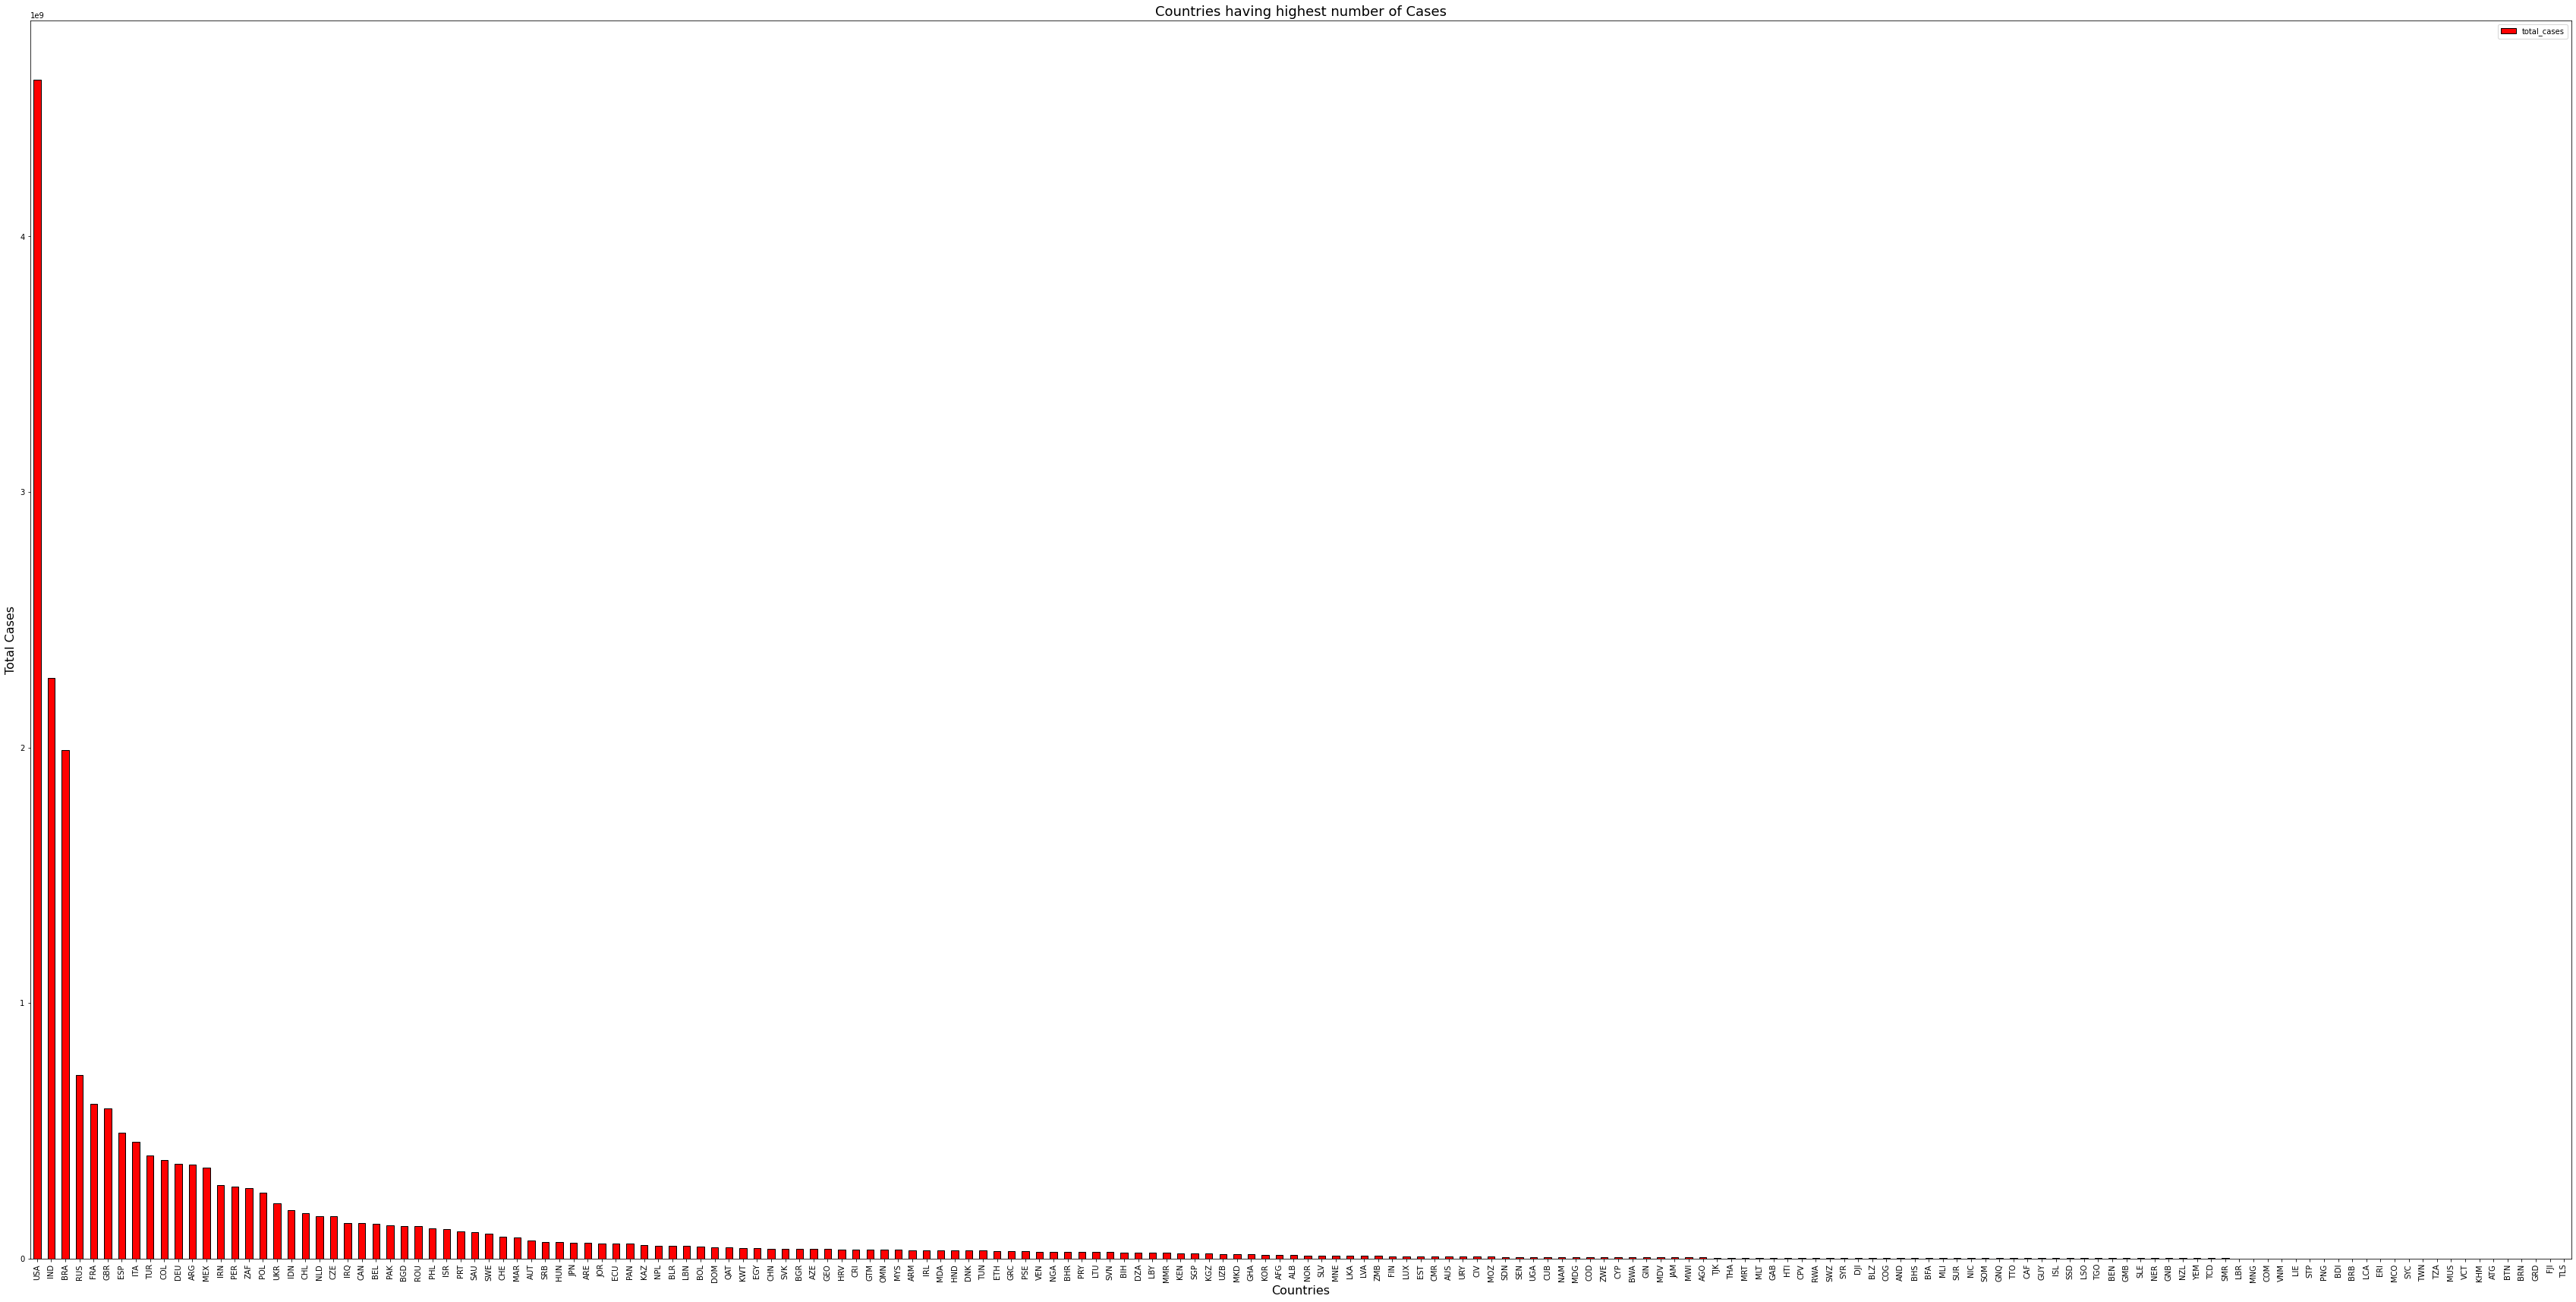

In [40]:
#In terms of Cases
plot_data = df[['iso','total_cases']]
plot_data =plot_data.groupby('iso').sum()

plot_data.sort_values(by='total_cases',
                      axis=0,
                      ascending=False,
                      inplace=False,
                      kind='quicksort',
                      na_position='last').plot(kind='bar',color='r',edgecolor='k',figsize=(60,30))
plt.title("Countries having highest number of Cases",fontsize=18)                    
plt.xlabel("Countries",fontsize=16)
plt.ylabel("Total Cases",fontsize=16)

Text(0, 0.5, 'Total Cases')

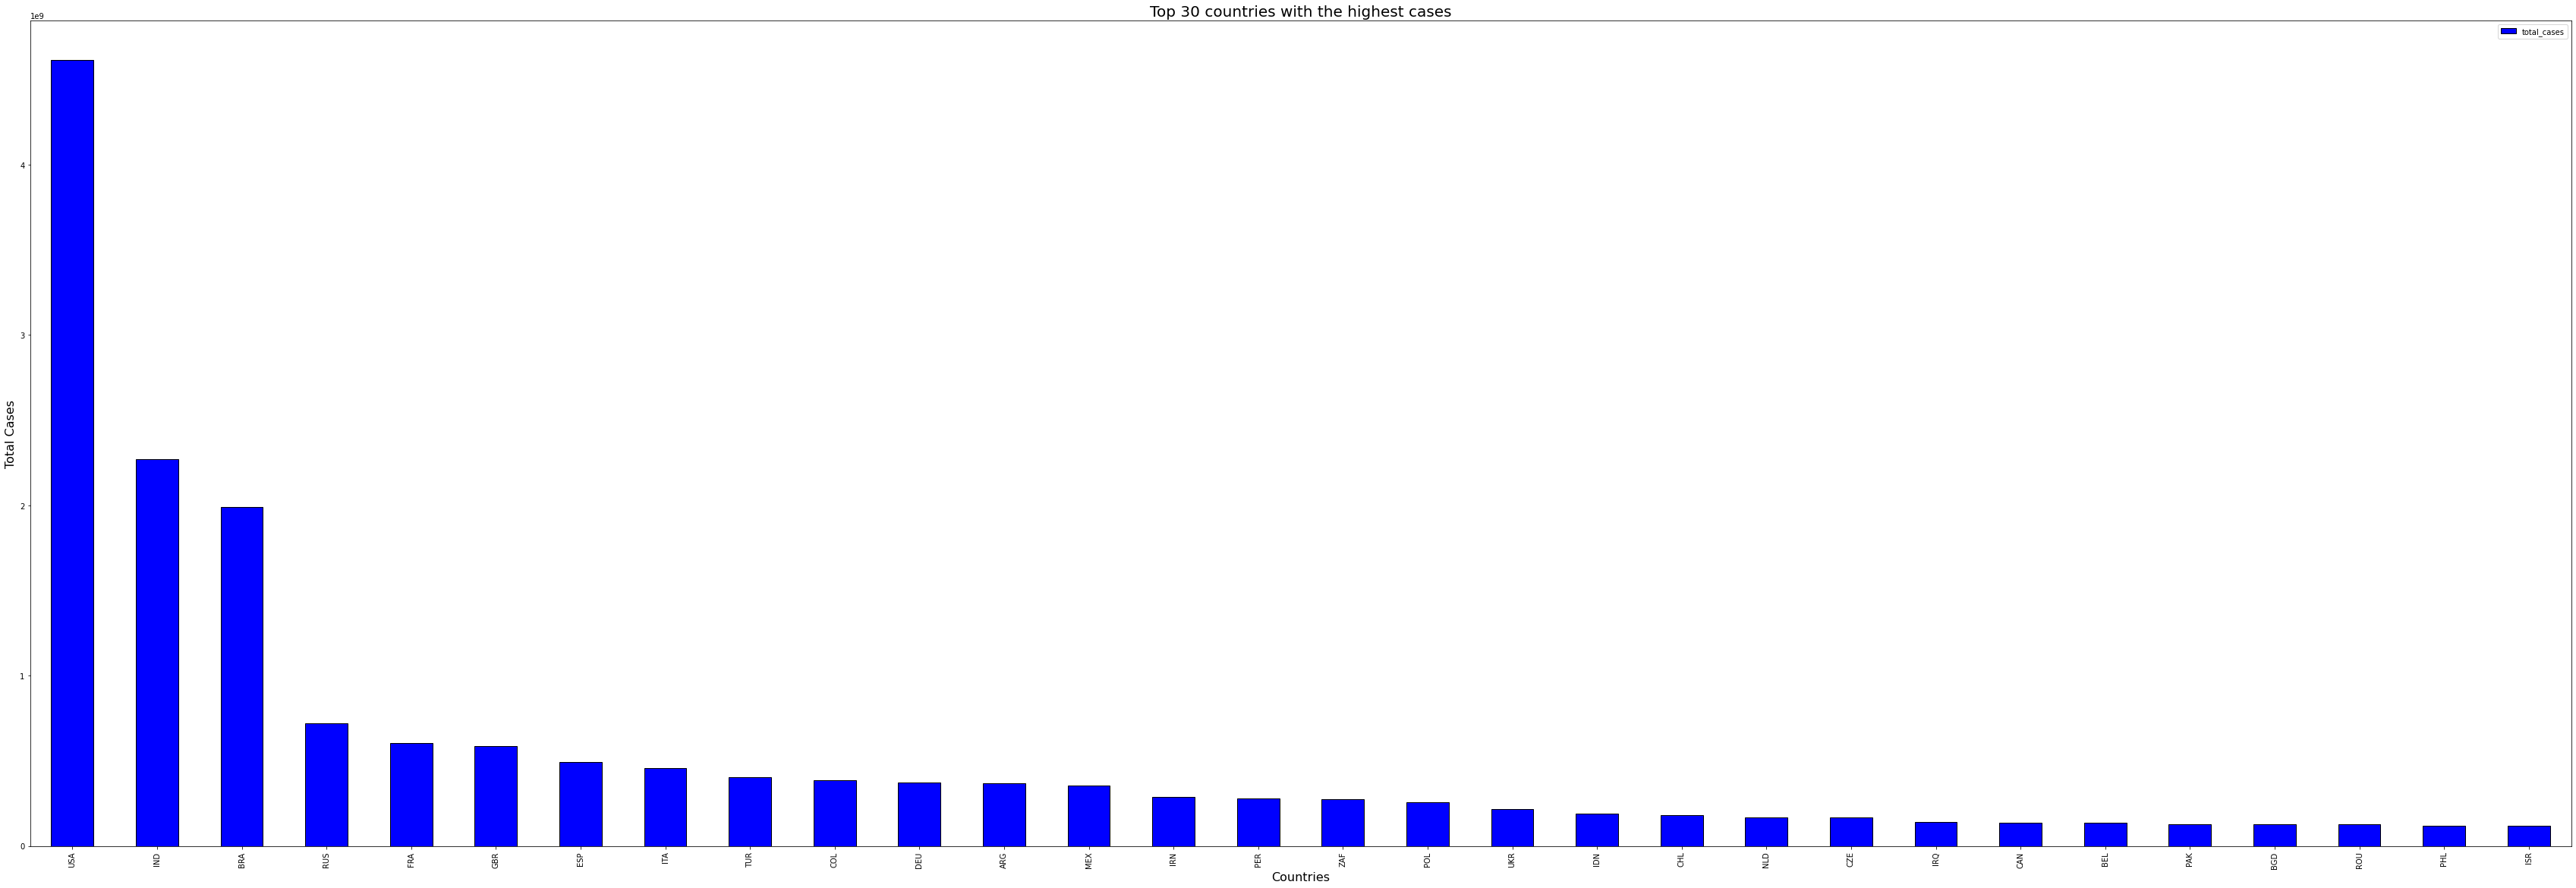

In [41]:
#Top 30 countries with the highest cases
test=plot_data.sort_values(by='total_cases',axis=0,ascending=False,inplace=False,kind='quicksort',na_position='last')
test.nlargest(30,'total_cases').plot(kind='bar',color='blue',edgecolor='k',figsize=(60,20))
plt.title("Top 30 countries with the highest cases",fontsize=20)
plt.xlabel("Countries",fontsize=16)
plt.ylabel("Total Cases",fontsize=16)

Text(0, 0.5, 'Total cases')

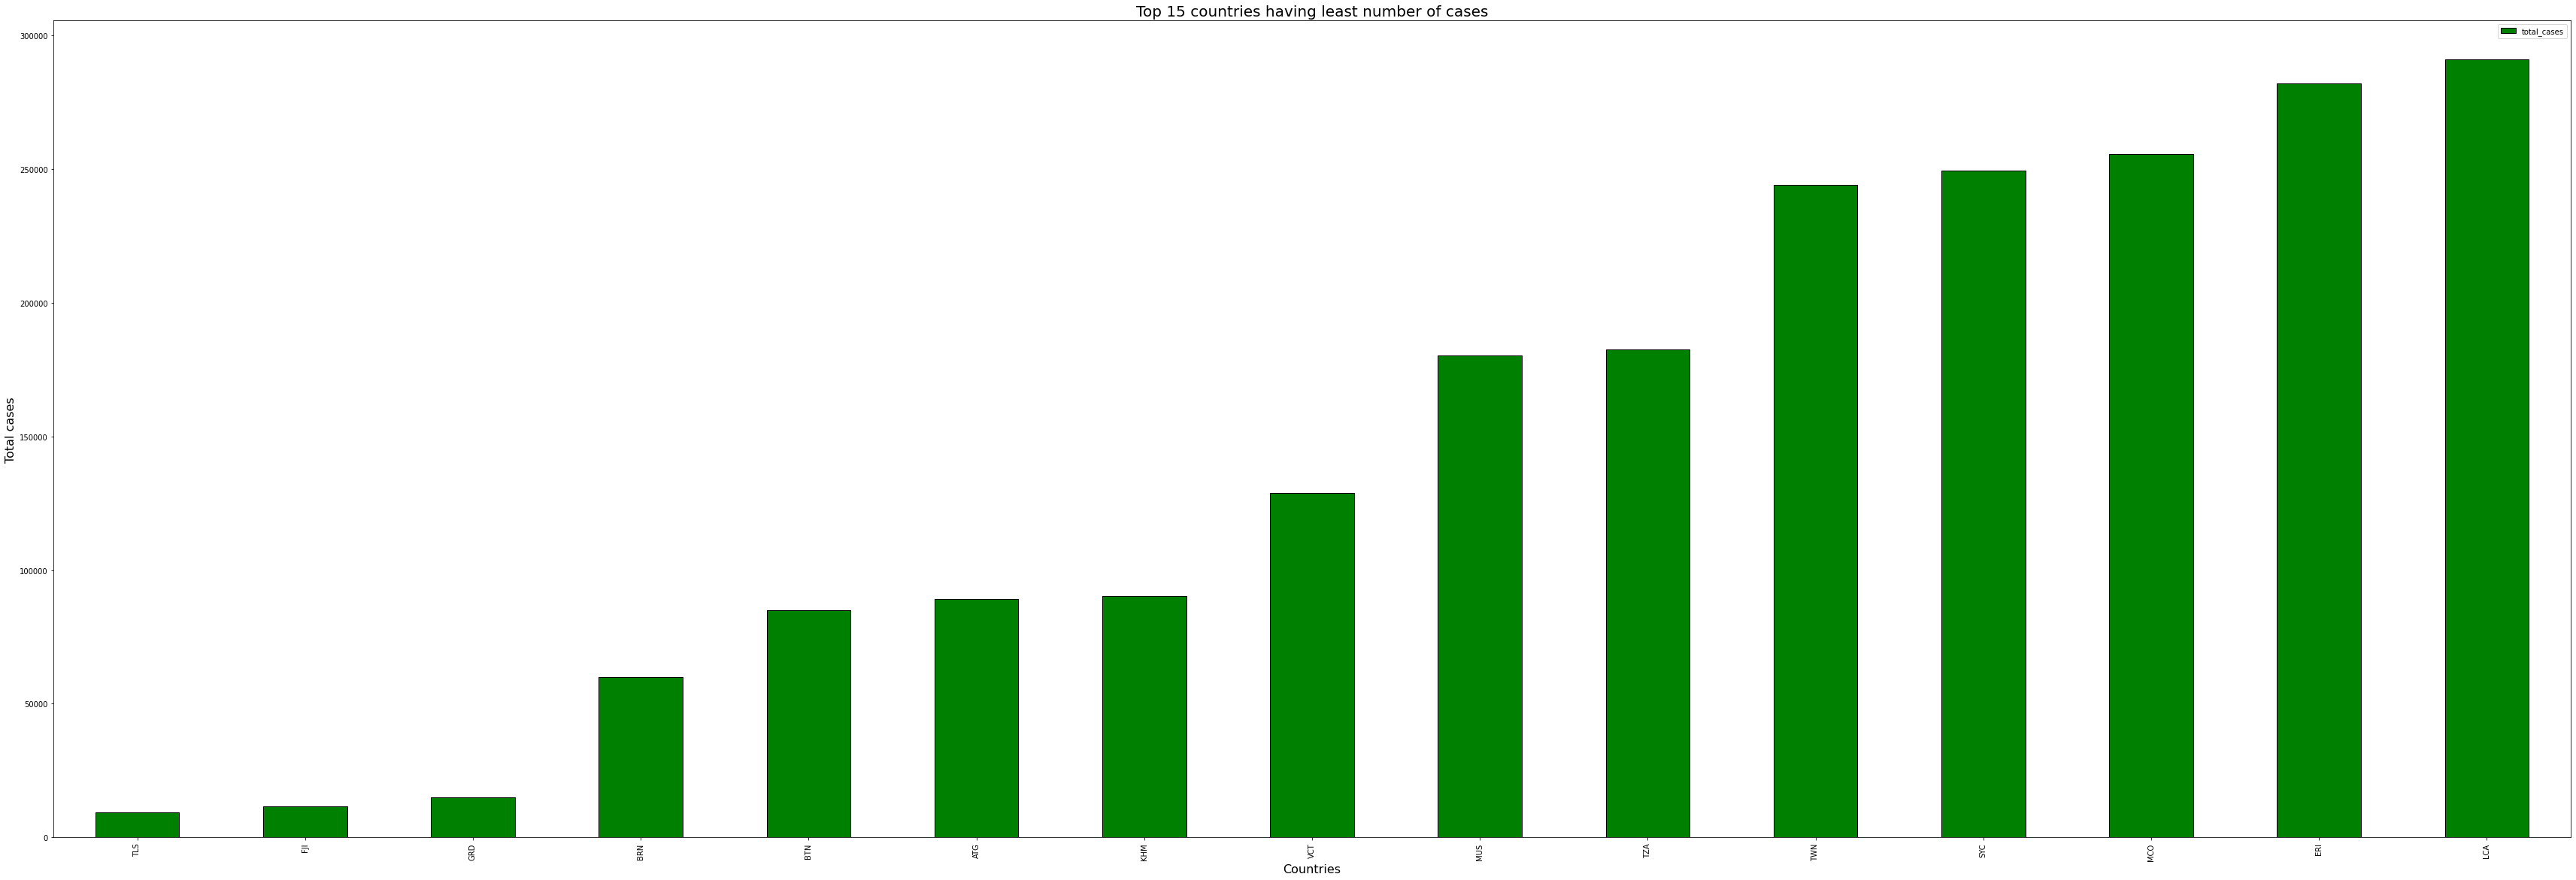

In [42]:
#Top 15 countries with the least cases
test=plot_data.sort_values(by='total_cases',axis=0,ascending=False,inplace=False,kind='quicksort',na_position='last')
test.nsmallest(15,'total_cases').plot(kind='bar',color='green',edgecolor='k',figsize=(60,20))
plt.title("Top 15 countries having least number of cases",fontsize=20)
plt.xlabel("Countries",fontsize=16)
plt.ylabel("Total cases",fontsize=16)

Country having highest number of cases

In [43]:
cases=df[['location','total_cases']]
cases=cases.groupby('location').sum().sort_values(by='total_cases',axis=0,ascending=False,inplace=False,kind='quicksort',na_position='last')
HighestCases=cases.nlargest(1,'total_cases')
HighestCases=HighestCases.reset_index()
print("The country with the highest number of cases is :")
HighestCases

The country with the highest number of cases is :


,location,total_cases
0,United States,4614721351


In [44]:
fig2=px.scatter(HighestCases,x='location',y='total_cases',size='total_cases',size_max=50,color=HighestCases.index,title="Country with highest number of cases")
fig2.show()

Country having lowest number of cases

In [45]:
LowestCases=cases.nsmallest(1,'total_cases')
LowestCases=LowestCases.reset_index()
print("The country with the lowest number of cases is :")
LowestCases

The country with the lowest number of cases is :


,location,total_cases
0,Timor,9477


In [46]:
fig3=px.scatter(LowestCases,x='location',y='total_cases',size='total_cases',size_max=50,color=LowestCases.index,title="Country with least number of cases")
fig3.show()

**4. Forecasting for a month based on previous data - INDIA**

In [47]:
df_forecastindia=df_india[['ds','active_cases']]
df_forecastindia=df_forecastindia.rename(columns={'active_cases':'y'})
df_forecastindia

,ds,y
27739,2020-03-11,6
27740,2020-03-12,11
27741,2020-03-13,9
27742,2020-03-14,20
27743,2020-03-15,11
...,...,...
28135,2021-04-11,168912
28136,2021-04-12,161736
28137,2021-04-13,184372
28138,2021-04-14,200739


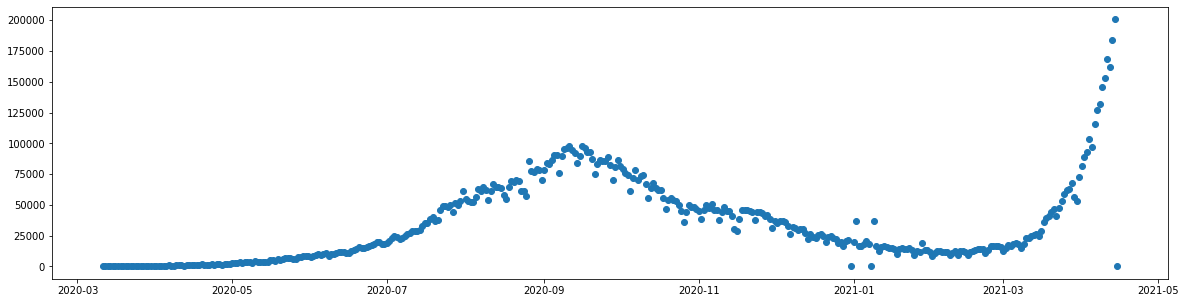

In [48]:
plt.figure(figsize=(20,5))
plt.scatter(df_forecastindia['ds'],df_forecastindia['y'])
plt.show()

In [49]:
from fbprophet import Prophet
model=Prophet(changepoint_prior_scale=1)
model.fit(df_forecastindia)
forecast=model.make_future_dataframe(periods=30,freq='D')
forecast=model.predict(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [50]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-11,-1410.117674,-16789.367457,19323.495451,-1410.117674,-1410.117674,2858.683228,2858.683228,2858.683228,2858.683228,2858.683228,2858.683228,0.0,0.0,0.0,1448.565554
1,2020-03-12,-1330.057459,-21838.755892,16479.674234,-1330.057459,-1330.057459,-1247.460359,-1247.460359,-1247.460359,-1247.460359,-1247.460359,-1247.460359,0.0,0.0,0.0,-2577.517818
2,2020-03-13,-1249.997244,-18384.534729,18791.818817,-1249.997244,-1249.997244,948.425038,948.425038,948.425038,948.425038,948.425038,948.425038,0.0,0.0,0.0,-301.572206
3,2020-03-14,-1169.937029,-17960.771934,18500.102479,-1169.937029,-1169.937029,1893.268329,1893.268329,1893.268329,1893.268329,1893.268329,1893.268329,0.0,0.0,0.0,723.331301
4,2020-03-15,-1089.876814,-18003.725833,18310.364780,-1089.876814,-1089.876814,192.774457,192.774457,192.774457,192.774457,192.774457,192.774457,0.0,0.0,0.0,-897.102357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,2021-05-11,133759.465222,111525.138406,154112.710803,124021.630386,142827.873258,-358.988391,-358.988391,-358.988391,-358.988391,-358.988391,-358.988391,0.0,0.0,0.0,133400.476831
427,2021-05-12,135112.540837,116261.381650,158943.366204,124675.560690,144765.204363,2858.683228,2858.683228,2858.683228,2858.683228,2858.683228,2858.683228,0.0,0.0,0.0,137971.224066
428,2021-05-13,136465.616452,112453.248560,154997.506385,125469.334348,146679.795910,-1247.460359,-1247.460359,-1247.460359,-1247.460359,-1247.460359,-1247.460359,0.0,0.0,0.0,135218.156093
429,2021-05-14,137818.692067,117624.121527,160742.600072,126118.521384,148684.337170,948.425038,948.425038,948.425038,948.425038,948.425038,948.425038,0.0,0.0,0.0,138767.117106


In [51]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-03-11,1448.565554,-16789.367457,19323.495451
1,2020-03-12,-2577.517818,-21838.755892,16479.674234
2,2020-03-13,-301.572206,-18384.534729,18791.818817
3,2020-03-14,723.331301,-17960.771934,18500.102479
4,2020-03-15,-897.102357,-18003.725833,18310.364780
...,...,...,...,...
426,2021-05-11,133400.476831,111525.138406,154112.710803
427,2021-05-12,137971.224066,116261.381650,158943.366204
428,2021-05-13,135218.156093,112453.248560,154997.506385
429,2021-05-14,138767.117106,117624.121527,160742.600072


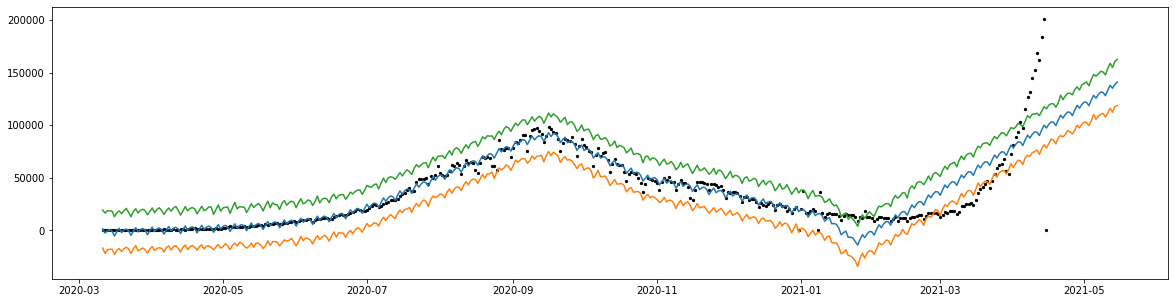

In [52]:
plt.figure(figsize=(20,5))
plt.scatter(df_forecastindia['ds'],df_forecastindia['y'],s=5,c='k')
plt.plot(forecast['ds'],forecast['yhat'])
plt.plot(forecast['ds'],forecast['yhat_lower'])
plt.plot(forecast['ds'],forecast['yhat_upper'])
plt.show()

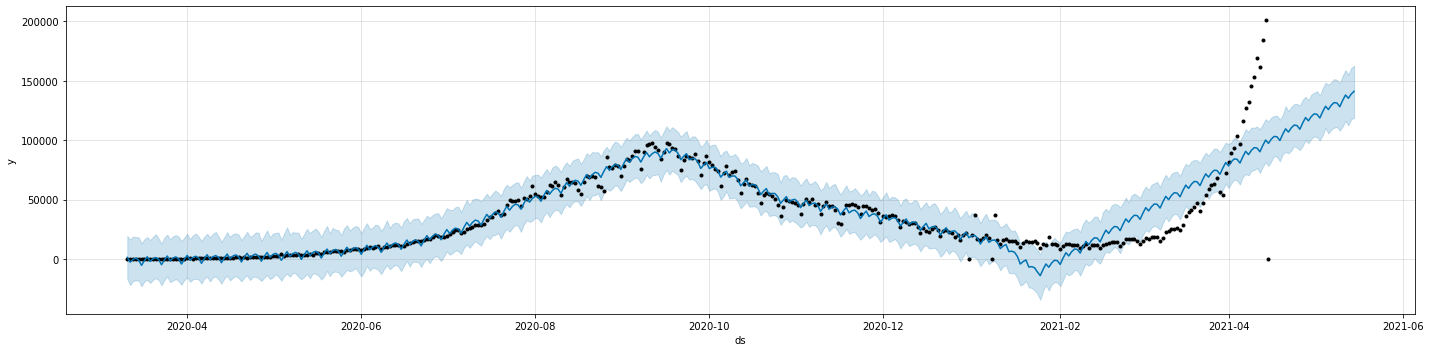

In [54]:
model.plot(forecast,figsize=(20,5));